<a href="https://colab.research.google.com/github/victortello17/victortello17/blob/main/TAREA1_FC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

VICTOR TELLO MARCA

(2p)Desarrolle la expresion $\sqrt{1+x}$ en serie de Taylor $T_4(x)$ mediante el polinomio de grado 4 y calcule $\sqrt{1.0001}$ con el respectivo error de truncamiento.

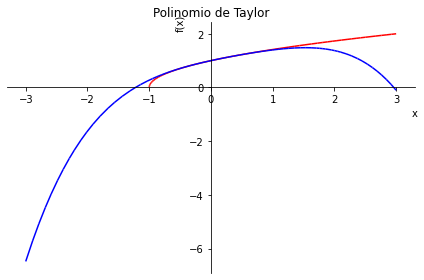

 Taylor:      -5*x**4/128 + x**3/16 - x**2/8 + x/2 + 1
 funcion:     sqrt(x + 1)
 xi:          0.0001
 estimado  :  1.00004999875006
 real:        1.00004999875006
 error de truncamiento:  2.7343750000000005e-22


In [ ]:
from math import *
import sympy as sp
from sympy.plotting import plot

def PolTaylor(a,n):
  x=sp.symbols('x') #define la variable simbólica x
  f=sp.sqrt(1+x)
  F=f #copia de la funcion
  T=f.subs(x,a)
  for k in range(0,n+1):
    dfk=sp.diff(f,x)
    if k==0:
      T=T
    else:
      T=T+dfk.subs(x,a)*((x-a)**k)/factorial(k)
      f=dfk

  g = plot(F, T, (x, a-3, a+3), title = 'Polinomio de Taylor', show=False)
  g[0].line_color = 'r'
  g[1].line_color = 'b'
  g.show()  

  F=sp.expand(T)
  pxi=F.subs(x,xi)

  f=sp.sqrt(1+x)
  
  fxi=f.subs(x,xi)
  E_5 = 7*(xi)**5/256

  print(' Taylor:     ', sp.expand(T))
  print(' funcion:    ', f)
  print(' xi:         ', xi)
  print(' estimado  : ', pxi)
  print(' real:       ', fxi)
  print(' error de truncamiento: ', E_5)



a=0
n=4
xi=0.0001
PolTaylor (a,n)

(4p) Considerar el problema de aproximaci ́on de la funcion $cos(x)$ mediante el desarrollo en serie de Taylor.


*   Escribir un programa que calcule la aproximacion de la funcion truncado luego de $n =1,2,3,5,7,9$ terminos $T_n(x)$ y el error de truncamiento calculado comparado con el valor exacto de $cos(x)$. Correr el programa con $x = π/12$




In [ ]:
from math import *
import sympy as sp
from sympy.plotting import plot

def PolTaylor(a,n):
  x=sp.symbols('x') #define la variable simboliica x
  f=sp.cos(x)
  F=f #copia de la funcion
  T=f.subs(x,a)
  Tr=f.subs(x,pi/12)
  print('El valor de cos(x) evaluado en pi/2: ',Tr)
  print('n ', '  valor estimado ', '       error')
  for k in range(1,n+1):
    Termino_k = (-1)**(k-1)*x**(2*(k-1))/factorial(2*(k-1))
    if k==1:
      T=T
    else:
      T = T + Termino_k 
    Ti=T.subs(x,xi)
    errT = abs(Ti - Tr)
    
    fmt = '{}| {} |{}'
    data = [k, Ti, errT]

    print(fmt.format(*data))
  
  

a=0
xi=pi/12
n=9

PolTaylor (a,n)


El valor de cos(x) evaluado en pi/2:  0.965925826289068
n    valor estimado         error
1| 1 |0.0340741737109317
2| 0.965730540273995 |0.000195286015073015
3| 0.965926272918981 |4.46629912387309E-7
4| 0.965925825742181 |5.46887202190760E-10
5| 0.965925826289485 |4.16666701141821E-13
6| 0.965925826289068 |1.11022302462516E-16
7| 0.965925826289068 |1.11022302462516E-16
8| 0.965925826289068 |1.11022302462516E-16
9| 0.965925826289068 |1.11022302462516E-16


*   Para el caso de $n = 5$ estimar el error de truncamiento mediante la formula para $E_{n+1}$ y comparar con los resultados del punto a)


In [ ]:
import numpy as np
def PolTaylor(a,n):
  x=sp.symbols('x') #define la variable simboliica x
  f=sp.cos(x)
  F=f #copia de la funcion
  T=f.subs(x,a)
  for k in range(1,n+1):
    Termino_k = (-1)**(k-1)*x**(2*(k-1))/factorial(2*(k-1))
    if k==1:
      T=T
    else:
      T = T + Termino_k
 
  Tr=f.subs(x,pi/12)
  Ti=T.subs(x,xi)
  errT = abs(Ti - Tr)

  F=sp.expand(T)
  pxi=F.subs(x,xi)
  

  f=sp.cos(x)
  
  fxi=f.subs(x,xi)
  E_6 = xi**10/3628800
  Com = abs(E_6-errT)

  print(' Taylor     :', sp.expand(T))
  print(' funcion    :', f)
  print(' xi         :', xi)
  print(' estimado   :', pxi)
  print(' real       :', fxi)
  print(' error de truncamiento: ', E_6)
  print(' error calculado en a: ', errT)
  print(' comparando errores: ', Com)



a=0
n=5
xi=np.pi/12
PolTaylor (a,n)

 Taylor     : x**8/40320 - x**6/720 + x**4/24 - x**2/2 + 1
 funcion    : cos(x)
 xi         : 0.2617993877991494
 estimado   : 0.965925826289485
 real       : 0.965925826289068
 error de truncamiento:  4.1679570365191566e-13
 error calculado en a:  4.16666701141821e-13
 comparando errores:  1.29002510094411e-16


*   Modificar el programa desarrollado en el punto a) que permita calcular las aproximaciones de la funcion en el intervalo de $[−π/2, π/2]$ para $n = 1,2,3,5,7,9$ y guardar los datos $x$, $T_n(x)$ en una matriz. Graficar las aproximaciones con diferentes $n$ en una sola grafica. ¿En que region es mejor la convergencia?

Introduzca el numero de terminos "n" : 10


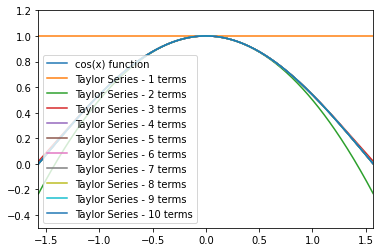

,x,f(x),T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
0,-1.570796,6.123234e-17,1.0,-0.233701,0.019969,-0.000895,0.000025,-4.647660e-07,6.321470e-09,-6.513357e-11,5.260631e-13,-3.376922e-15
1,-1.560796,9.999833e-03,1.0,-0.218043,0.029229,0.009150,0.010023,9.999403e-03,9.999839e-03,9.999833e-03,9.999833e-03,9.999833e-03
2,-1.550796,1.999867e-02,1.0,-0.202485,0.038510,0.019191,0.020020,1.999827e-02,1.999867e-02,1.999867e-02,1.999867e-02,1.999867e-02
3,-1.540796,2.999550e-02,1.0,-0.187027,0.047812,0.029228,0.030016,2.999513e-02,2.999551e-02,2.999550e-02,2.999550e-02,2.999550e-02
4,-1.530796,3.998933e-02,1.0,-0.171669,0.057133,0.039261,0.040008,3.998899e-02,3.998934e-02,3.998933e-02,3.998933e-02,3.998933e-02
...,...,...,...,...,...,...,...,...,...,...,...,...
310,1.529204,4.158066e-02,1.0,-0.169232,0.058619,0.040858,0.041600,4.158033e-02,4.158067e-02,4.158066e-02,4.158066e-02,4.158066e-02
311,1.539204,3.158740e-02,1.0,-0.184574,0.049295,0.030826,0.031608,3.158703e-02,3.158740e-02,3.158740e-02,3.158740e-02,3.158740e-02
312,1.549204,2.159098e-02,1.0,-0.200016,0.039990,0.020790,0.021613,2.159058e-02,2.159098e-02,2.159098e-02,2.159098e-02,2.159098e-02
313,1.559204,1.159239e-02,1.0,-0.215558,0.030706,0.010749,0.011615,1.159197e-02,1.159240e-02,1.159239e-02,1.159239e-02,1.159239e-02


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import pandas as pd

def func_cos(x, n):
    C = 0
    for i in range(n):
        coef = (-1)**i
        num = x**(2*i)
        denom = math.factorial(2*i)
        C += ( coef ) * ( (num)/(denom) )
    return C
    
n=int(input('Introduzca el numero de terminos "n" : '))
angles = np.arange(-np.pi/2, np.pi/2 ,0.01)
y = np.cos(angles) 
T_cos=[] 
T_cos.append(y)

df = pd.DataFrame()
df["x"]= angles
df['f(x)']= T_cos[0]

p_cos = np.cos(angles)

fig, ax = plt.subplots()
ax.plot(angles,p_cos)

ax.set_ylim([-0.5,1.2])
ax.set_xlim([-math.pi/2, math.pi/2])

for k in range(1,n+1):
  L= [func_cos(_x, k) for _x in angles]
  T_cos.append(L)
  df[f"T{k}"]=T_cos[k]
  ax.plot(df["x"],df[f"T{k}"])

legend_lst = ['cos(x) function']
for i in range(1,n+1):
    legend_lst.append(f'Taylor Series - {i} terms')
ax.legend(legend_lst, loc=3)

plt.show()

df

(2p)Si se aproxima la primera derivada de la funcion $f(x) = x^3 − 2x$ mediante el esquema de diferencia centrada en $x = 1$
\begin{equation}
 f'(x)=\dfrac{f(x+h)-f(x-h)}{2h}
\end{equation}
para valores de que orden de h se obtiene el minimo error de calculo?

In [ ]:
from math import *
import sympy as sp
import numpy as np

x=sp.symbols('x') #define la variable simbolica x
f= x**3-2*x
F=f #copia de la funcion 
J=[]
df=sp.diff(f,x)
dfp=df.subs(x,1)
print("El valor de f'(x=1) es: ",dfp)
for h in np.arange(0.001,0.011,0.001):
   D =(f.subs(x,(1+h))-f.subs(x,(1-h)))/(2*h)
   print('Cuando h=',h,", se aproxima f'(x) a: ", D)



El valor de f'(x=1) es:  1
Cuando h= 0.001 , se aproxima f'(x) a:  1.00000099999997
Cuando h= 0.002 , se aproxima f'(x) a:  1.00000400000000
Cuando h= 0.003 , se aproxima f'(x) a:  1.00000899999997
Cuando h= 0.004 , se aproxima f'(x) a:  1.00001599999999
Cuando h= 0.005 , se aproxima f'(x) a:  1.00002499999998
Cuando h= 0.006 , se aproxima f'(x) a:  1.00003600000000
Cuando h= 0.007 , se aproxima f'(x) a:  1.00004899999999
Cuando h= 0.008 , se aproxima f'(x) a:  1.00006399999999
Cuando h= 0.009000000000000001 , se aproxima f'(x) a:  1.00008099999999
Cuando h= 0.010000000000000002 , se aproxima f'(x) a:  1.00010000000000


4. (3p) Escriba un programa que calcule las diferencias finitas hacia atras de cualquier orden $∇^r$ y para cualquier conjunto $x_k$, $f_k$ con k = 0,1,2,3 ,... m valores de datos en la tabla.

In [ ]:
# Generación de tablas de diferencias hacia atrás

# Importing NumPy Library
import numpy as np
import sys

# Número de lectura de incógnitas
n = int(input('Ingrese el número de puntos de datos: '))

# Hacer una matriz numpy de tamaño n & n x n e inicializar
# a cero para almacenar el valor de x e y junto con las diferencias de y
x = np.zeros((n))
y = np.zeros((n,n))


# Lectura de puntos de datos
print('Ingrese datos de X y Y: ')
for i in range(n):
    x[i] = float(input( 'x['+str(i)+']='))
    y[i][0] = float(input( 'y['+str(i)+']='))
    
# Generando tabla de diferencias hacia atrás
for i in range(1,n):
    for j in range(n-1,i-2,-1):
        y[j][i] = y[j][i-1] - y[j-1][i-1]

        
print('\nTABLA DE DIFERENCIAS HACIA ATRÁS\n');

for i in range(0,n):
    print('%0.2f' %(x[i]), end='')
    for j in range(0, i+1):
        print('\t%0.2f' %(y[i][j]), end='')
    print()


Ingrese el número de puntos de datos: 9
Ingrese datos de X y Y: 
x[0]=1
y[0]=2
x[1]=4
y[1]=5
x[2]=9
y[2]=10
x[3]=12
y[3]=48
x[4]=78
y[4]=35
x[5]=59
y[5]=70
x[6]=59
y[6]=51
x[7]=48
y[7]=78
x[8]=95
y[8]=105

TABLA DE DIFERENCIAS HACIA ATRÁS

1.00	2.00
4.00	5.00	3.00
9.00	10.00	5.00	2.00
12.00	48.00	38.00	33.00	31.00
78.00	35.00	-13.00	-51.00	-84.00	-115.00
59.00	70.00	35.00	48.00	99.00	183.00	298.00
59.00	51.00	-19.00	-54.00	-102.00	-201.00	-384.00	-682.00
48.00	78.00	27.00	46.00	100.00	202.00	403.00	787.00	1469.00
95.00	105.00	27.00	0.00	-46.00	-146.00	-348.00	-751.00	-1538.00	-3007.00


4a - (2p) Aplicar el programa desarrollado para hallar todas las diferencias finitas usando los datos de la siguiente tabla:
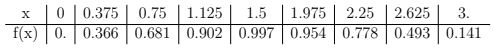

Tabla Diferencia Finita: 
     i     xi     fi    df1    df2    df3    df4    df5    df6    df7    df8  \
0  0.0  0.000  0.000  0.366 -0.051 -0.043  0.011  0.009 -0.012  0.017 -0.025   
1  1.0  0.375  0.366  0.315 -0.094 -0.032  0.020 -0.003  0.005 -0.008  0.000   
2  2.0  0.750  0.681  0.221 -0.126 -0.012  0.017  0.002 -0.003  0.000  0.000   
3  3.0  1.125  0.902  0.095 -0.138  0.005  0.019 -0.001  0.000  0.000  0.000   
4  4.0  1.500  0.997 -0.043 -0.133  0.024  0.018  0.000  0.000  0.000  0.000   
5  5.0  1.975  0.954 -0.176 -0.109  0.042  0.000  0.000  0.000  0.000  0.000   
6  6.0  2.250  0.778 -0.285 -0.067  0.000  0.000  0.000  0.000  0.000  0.000   
7  7.0  2.625  0.493 -0.352  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
8  8.0  3.000  0.141  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   

   df9  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  
5  0.0  
6  0.0  
7  0.0  
8  0.0  


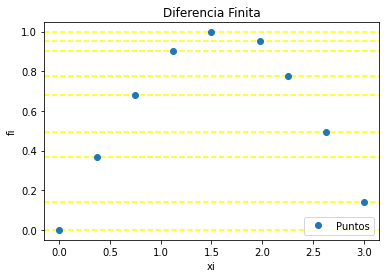

In [ ]:
# Tabla de Diferencias finitas
# resultado en: [título,tabla]
# Tarea: verificar tamaño de vectores
import numpy as np
import pandas as pd
import math as m

# INGRESO, Datos de prueba
xi = np.array([0., 0.375, 0.75, 1.125, 1.5, 1.975, 2.25, 2.625, 3.0])
fi = np.array([0., 0.366, 0.681, 0.902, 0.997, 0.954, 0.778, 0.493, 0.141])

# PROCEDIMIENTO

# Tabla de Diferencias Finitas
titulo = ['i','xi','fi']
n  = len(xi)
ki = np.arange(0,n,1)
tabla = np.concatenate(([ki],[xi],[fi]),axis=0)
tabla = np.transpose(tabla)

# diferencias finitas vacia
dfinita = np.zeros(shape=(n,n),dtype=float)
tabla   = np.concatenate((tabla,dfinita), axis=1)

# Calcula tabla, inicia en columna 3
[n,m] = np.shape(tabla)
diagonal = n-1
j = 3
while (j < m):
    # Añade título para cada columna
    titulo.append('df'+str(j-2))

    # cada fila de columna
    i = 0
    while (i < diagonal):
        tabla[i,j] = tabla[i+1,j-1]-tabla[i,j-1]
        i = i + 1

    diagonal = diagonal - 1
    j = j + 1

    # SALIDA
print('Tabla Diferencia Finita: ')

#print(tabla)
J=pd.DataFrame(tabla,
              columns = [titulo])

#J=J.drop(['i'], axis=1)
print(J)

# Gráfica
import matplotlib.pyplot as plt

for i in range(0,n,1):
    plt.axhline(fi[i],ls='--', color='yellow')

plt.plot(xi,fi,'o', label = 'Puntos')

plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Diferencia Finita')
plt.show()


4b - (4p) Aplicado a los datos de la tabla, determinar numericamente la primera derivada $Df(x_6)/dx$ mediante la formula general usando el esquema de los operadores de diferencias finitas hacia atras con 5 terminos en la serie.

In [ ]:
import numpy as np
import pandas as pd

def dfatras(x,f,r,T):
    """
    
    Parameters
    ----------
    x : real
        vector fila.
    f : real
        valores de la funcion.
    r: orden máximo de las diferencias finitas
    T : matriz real

    Returns
    -------
    matriz T con los operadores 

    """
    T[:,0]=x 
    T[:,1]=f

    for j in range(2,r+2):  # las columnas de 3 hasta  m
        for i in range(j-1,m+1):
            T[i,j] = T[i,j-1] - T[i-1,j-1]
    return T



x = np.array([0.,0.375,0.75,1.125,1.5,1.975,2.25,2.625,3.])
f = np.array([0.,0.366,0.681,0.902,0.997,0.954,0.778,0.493,0.141])

print(f"Ha ingresado {len(x)} elementos\n. Por lo que puede realizar diferencias finitas de orden: {len(x)-1} como máximo")
r=int(input("Ingrese el orden máximo de las diferencias finitas que desea calcular:"))
print("La matriz de diferencias finitas es la siguiente")
m = len(x)-1 # numero de datos en x
T = np.zeros(shape=(m+1,r+2))
dfatras(x,f,r,T)
df=pd.DataFrame()
df["x"]=T[:,0]
df["y"]=T[:,1]
for j in range(2,r+2):
  df[f"dif{j-1}"]=T[:,j]

df

Ha ingresado 9 elementos
. Por lo que puede realizar diferencias finitas de orden: 8 como máximo
Ingrese el orden máximo de las diferencias finitas que desea calcular:5
